# TP 1 – EXPLORACIÓN, LIMPIEZA Y ANÁLISIS DE DATOS

# Grupo 8


## Importamos librerías a utlizar para la resolución del TP

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pylab import savefig

## Leemos el dataset y le hacemos un primer análisis

In [3]:
df_raw=pd.read_csv("train.csv")

In [4]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


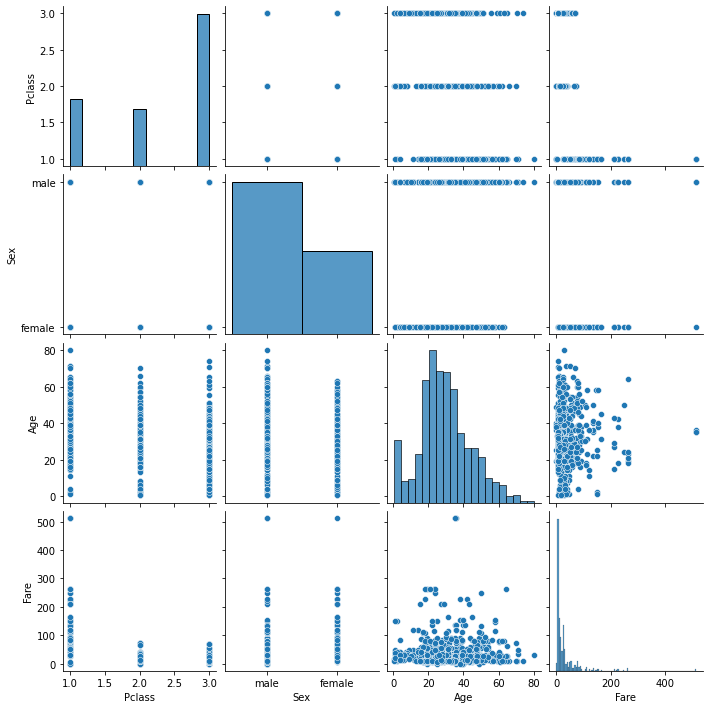

In [6]:
sns.pairplot(df_raw,vars=["Pclass","Sex","Age","Fare"],palette="plasma")
plt.show()

#### 1) Explorar el dataset del Titanic. Explicar la cantidad de filas y columnas que tiene el mismo, cuantas son descriptivas, cuantas son numéricas. ¿Existen valores vacíos? Responder las siguientes preguntas: ¿Cuánta gente sobrevivió y cuánta gente no? ¿Cuántos hombres y cuántas mujeres se tiene en la base de datos?

Cantidad de filas:

In [7]:
df_raw.shape[0]

891

Cantidad de columnas:

In [8]:
df_raw.shape[1]

12

#### Cuantas son descriptivas y cuantas numéricas:

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


De las 12 variables 7 son numéricas y 5 descrpitivas

#### ¿Existen valores vacíos?

<AxesSubplot:>

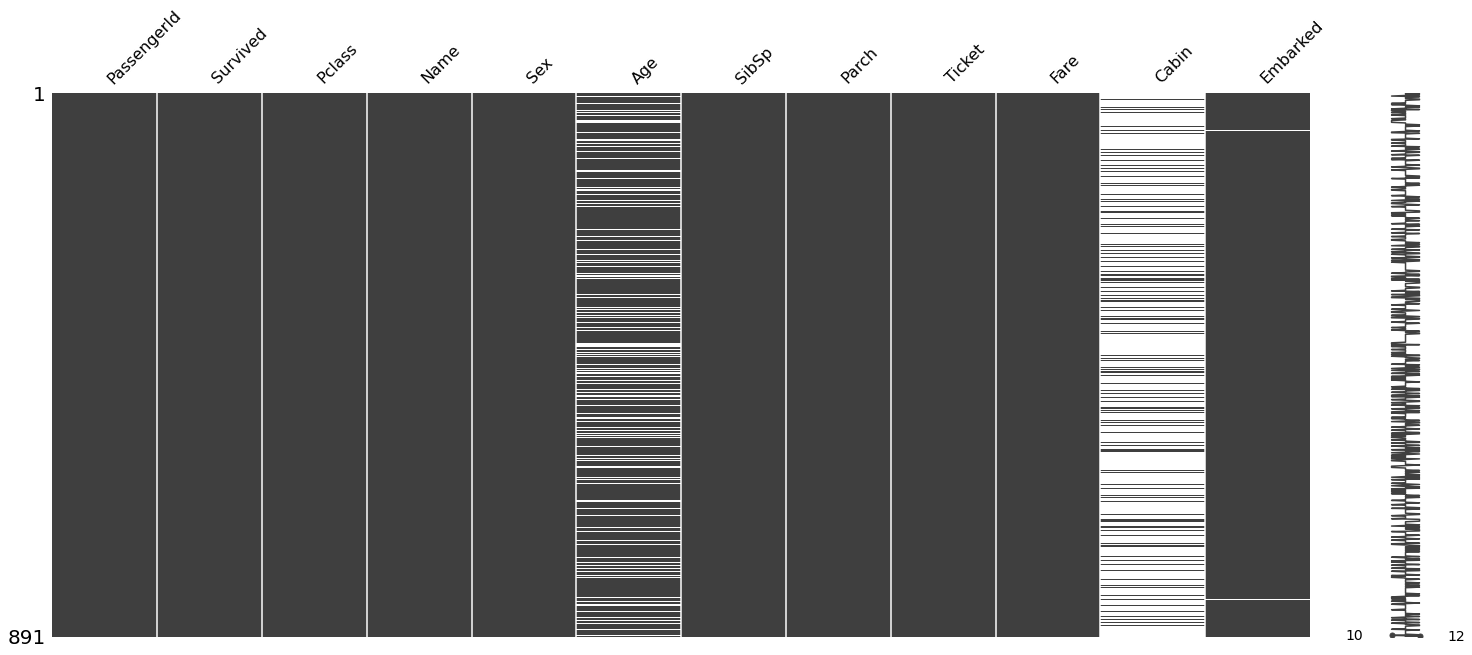

In [10]:
msno.matrix(df_raw)

In [11]:
df_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### ¿Cuánta gente sobrevivió y cuánta gente no?

In [12]:
df_raw["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df_raw["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

De las personas que están registradas en el dataset, 549 murieron (61.6%) y 342 lograron sobrevivir (38.4%)

#### ¿Cuántos hombres y cuántas mujeres se tiene en la base de datos?

In [14]:
df_raw["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

En la base de datos se tienen 577 hombres y 314 mujeres

Proporción de pclass del dataset:

In [15]:
df_raw["Pclass"].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Mas de la mitad del dataset corresponde a pasajeros de la tercera clase

#### 2) Proceso de limpieza. Todo dataset debe ser limpiado y preparado para realizar un análisis. Por lo general existen columnas vacías, filas con datos faltantes, columnas de mayor interés que otras. ¿Que trabajo realizarías? ¿Existen valores faltantes? Completar los “vacíos”, removerlos o en caso de incluirlos explicar por qué se dejan en el dataset.

##### Columna: "Cabin". Datos faltantes: 687

% Supervivencia de los que tienen registrado el número de la cabina:

In [16]:
df_raw[df_raw["Cabin"].notna()]["Survived"].value_counts(normalize=True)

1    0.666667
0    0.333333
Name: Survived, dtype: float64

% Supervivencia de los no que tienen registrado el número de la cabina:

In [17]:
df_raw[df_raw["Cabin"].isna()]["Survived"].value_counts(normalize=True)

0    0.700146
1    0.299854
Name: Survived, dtype: float64

Proporción en cada clase de los que tienen registrado el número de la cabina:

In [18]:
df_raw[df_raw["Cabin"].notna()]["Pclass"].value_counts(normalize=True)

1    0.862745
2    0.078431
3    0.058824
Name: Pclass, dtype: float64

Se puede observar que los que tienen registrado el numéro de cabina tuvieron mayor probabilidad de supervivencia, también se puede observar que la mayoría de los que tenian registrado el número de cabina correspondían a los de primera clase. No creemos conveniente eliminar las filas con valores faltantes en la columna "Cabin" ya que son la mayor proporción del dataset y a su vez se le estaría introduciendo un sesgo importante. A su vez el saber si tenían registrado el número de su cabina es un gran predictor de supervivencia por lo cual proceederemos a transformar a la columna "Cabin", introduciremos un 1 si el valor está registrado y un 0 si no tiene el valor registrado. Igualmente se debera proceeder con cautela ya que esta columna podría tener una fuerte colinealidad con otras columnas. Otro gran beneficio de esta decisión es que estamos tranformando una variable alfanumerica muy dificil de procesar a una binaría, la cúal nos da mucha información a la hora de predecir la supervivencia.

Como vamos a modificar el dataset crearemos una nueva variable con el nuevo dataset que iremos modificando para no perder el original

In [19]:
df=pd.read_csv("train.csv")

Realizamos la modificacion de la columna "Cabin" mencionada anteriormente

In [20]:
df["Cabin"] = df["Cabin"].where(df["Cabin"].isnull(), 1).fillna(0).astype(int)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


##### Columna: "Age" Datos faltantes: 177

In [22]:
df[df["Age"].notna()]["Survived"].value_counts(normalize=True)

0    0.593838
1    0.406162
Name: Survived, dtype: float64

In [23]:
df[df["Age"].isna()]["Survived"].value_counts(normalize=True)

0    0.706215
1    0.293785
Name: Survived, dtype: float64

Se puede observar que los que no tiene registrada la edad tuvieron una mayor probabiblidad de no sobrevivr de los que si la tenían registrada

Analizaremos en mayor profundidad la correlacion edad supervivencia:

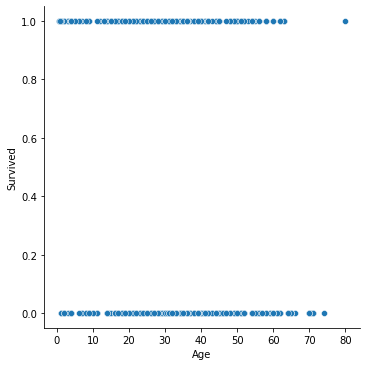

In [24]:
sns.relplot(x="Age", y="Survived", data=df)

In [25]:
df[(df["Age"].notna())&(df["Survived"]==1)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,457.768966,1.0,1.872414,28.343690,0.493103,0.527586,51.843205,0.431034
std,250.845515,0.0,0.836617,14.950952,0.731132,0.807147,70.458776,0.496077
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,260.500000,1.0,1.000000,19.000000,0.000000,0.000000,13.000000,0.000000
50%,452.000000,1.0,2.000000,28.000000,0.000000,0.000000,26.250000,0.000000
75%,669.500000,1.0,3.000000,36.000000,1.000000,1.000000,66.200000,1.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200,1.000000


In [26]:
df[(df_raw["Age"].notna())&(df["Survived"]==0)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,424.000000,424.0,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,442.299528,0.0,2.485849,30.626179,0.525943,0.365566,22.965456,0.141509
std,264.739548,0.0,0.743633,14.172110,1.044760,0.878341,31.448825,0.348958
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,200.750000,0.0,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,436.000000,0.0,3.000000,28.000000,0.000000,0.000000,11.887500,0.000000
75%,683.250000,0.0,3.000000,39.000000,1.000000,0.000000,26.550000,0.000000
max,891.000000,0.0,3.000000,74.000000,5.000000,6.000000,263.000000,1.000000


Como se puede observar la media de edad de los supervivientes es de 28 años con un desvio estandar de 14.9 mientras que la media de los no supervivientes es de 30 años con un desvio de 14.1. Se puede concluir que la edad de los pasajero no fue una variable muy significativa a la hora de su supervivencia por lo cual se procederá de la misma forma que con la columna cabin. Reemplazaremos con un 1 los que tengan registrada la edad y con un 0 los que no la tengan

In [27]:
df["Age"] = df["Age"].where(df["Age"].isnull(), 1).fillna(0).astype(int)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,1,0,0,373450,8.0500,0,S


##### Columna: "Embarked" Datos faltantes: 2

In [29]:
df_raw[df_raw["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Al ser tan solo dos datos faltantes procederemos a elminar estas filas del dataset

In [30]:
df["Embarked"]=df["Embarked"].dropna()

In [31]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [32]:
df = df[df['Embarked'].notna()]

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,1,0,0,373450,8.0500,0,S


In [34]:
df.shape

(889, 12)

#### 3) Visualización y análisis de los datos. Si quisiéramos predecir que personas sobrevivieron y que personas no sobrevivieron al accidente, ¿Con qué variables te quedarías? Explicar. ¿Existe correlación entre algunas variables numéricas?. Realizar al menos 3 gráficos que sirvan para entender mejor la base de datos y que permitan luego realizar un análisis más en detalle (¿Te animás a mejorar el formato del gráfico?)

Antes de armar el modelo de predicción eliminaremos columnas que no nos interesan y codificaremos variables para poder utilizarlas luego

In [35]:
df_pred=df.drop("PassengerId", axis=1)
conditions=[(df_pred["SibSp"]==0) & (df_pred["Parch"]==0)]   
values = [1]
df_pred["is.alone"]=np.select(conditions, values)
df_pred['is.C'] = df_pred['Embarked'].apply(lambda x: 1 if x == "C" else 0)
df_pred['is.S'] = df_pred['Embarked'].apply(lambda x: 1 if x == "S" else 0)
df_pred['Sex'].replace(["female","male"],[1,0],inplace=True)
df_pred=df_pred.drop(columns=["Name","SibSp","Parch","Ticket","Embarked"])

In [36]:
df_pred.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,is.alone,is.C,is.S
0,0,3,0,1,7.2500,0,0,0,1
1,1,1,1,1,71.2833,1,0,1,0
2,1,3,1,1,7.9250,0,1,0,1
3,1,1,1,1,53.1000,1,0,0,1
4,0,3,0,1,8.0500,0,1,0,1


Realizamos un ajuste con una regresión logística para evaluar la signficancia de las variables

In [37]:
X = df_pred.drop(["Survived"], axis=1)
y = df_pred.filter(items=["Survived"])

In [38]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Optimization terminated successfully.
         Current function value: 0.457550
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.312     
Dependent Variable: Survived         AIC:              829.5235  
Date:               2021-06-21 11:20 BIC:              867.8443  
No. Observations:   889              Log-Likelihood:   -406.76   
Df Model:           7                LL-Null:          -591.41   
Df Residuals:       881              LLR p-value:      9.0977e-76
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass        -0.6875    0.0974  -7.0579  0.0000  -0.8785  -0.4966
Sex            2.5969    0.1917  13.5493  0.0000   2.2212   2.

Nos quedamos con las tres variables más significativas y evaluaremos mediante una muestra de testeo la capacidad de predicción del modelo logístico

In [39]:
X = df_pred.drop(["Survived","Fare","is.alone","Age","is.C","is.S"], axis=1)
y = df_pred.filter(items=["Survived"])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression( max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [41]:
y_pred = logreg.predict(X_test)
print('El accuracy de la regresión logística es: {:.2f}'.format(logreg.score(X_test, y_test)))

El accuracy de la regresión logística es: 0.77


In [42]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[132  25]
 [ 37  73]]


Correlacion variables numéricas

In [112]:
figsize=(19, 15)
corr_df=df_raw[["Survived","Pclass","Age","SibSp","Parch","Fare"]].corr()
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.26,-0.55,0.10,0.16,0.22,1.00


No se observa gran correlación entre las variables numéricas, la mas correlacionadas son "Fare" y "Pclass" con -55%, que nos quiere decir que a mayor valor del ticket menor era la clase en la que viajaba, algo lógico a priori

Gráficos que nos permiten entender mejor la base de datos:

In [44]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


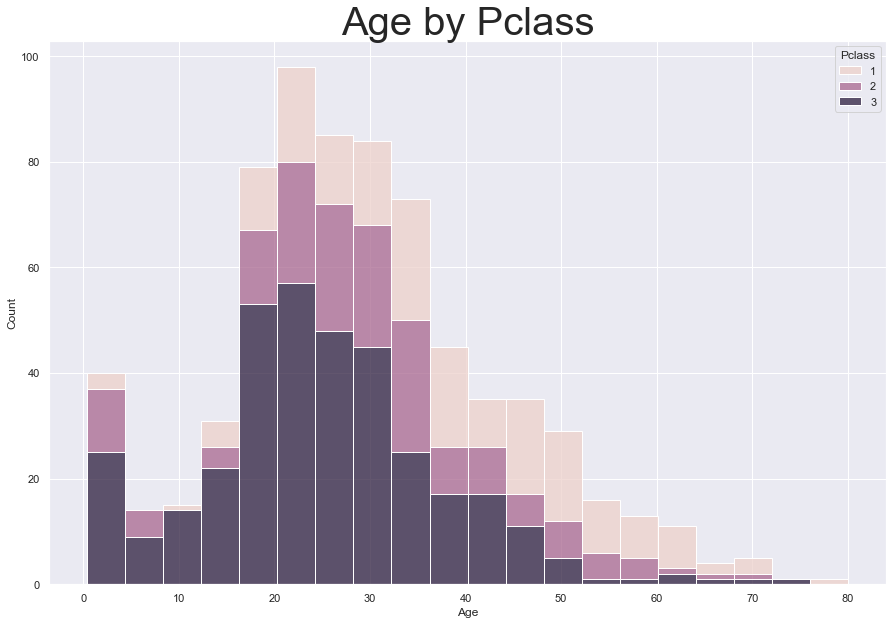

In [79]:
sns.set(rc={'figure.figsize':(15,10)})
svm=sns.histplot(data=df_raw, x="Age",hue="Pclass",multiple="stack")
svm.axes.set_title("Age by Pclass",fontsize=40)
figure = svm.get_figure()    
#figure.savefig('svm_conf.png', dpi=400)

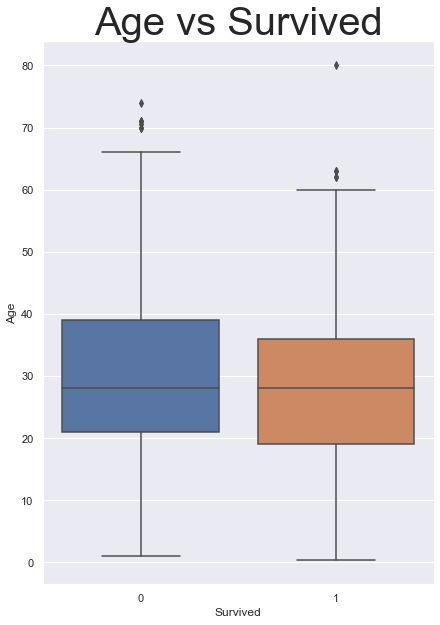

In [107]:
sns.set(rc={'figure.figsize':(7,10)})
ax = sns.boxplot(x="Survived", y="Age", data=df_raw)
ax.axes.set_title("Age vs Survived",fontsize=40)
figure = ax.get_figure()    
#figure.savefig('svm_conf1.png', dpi=400)

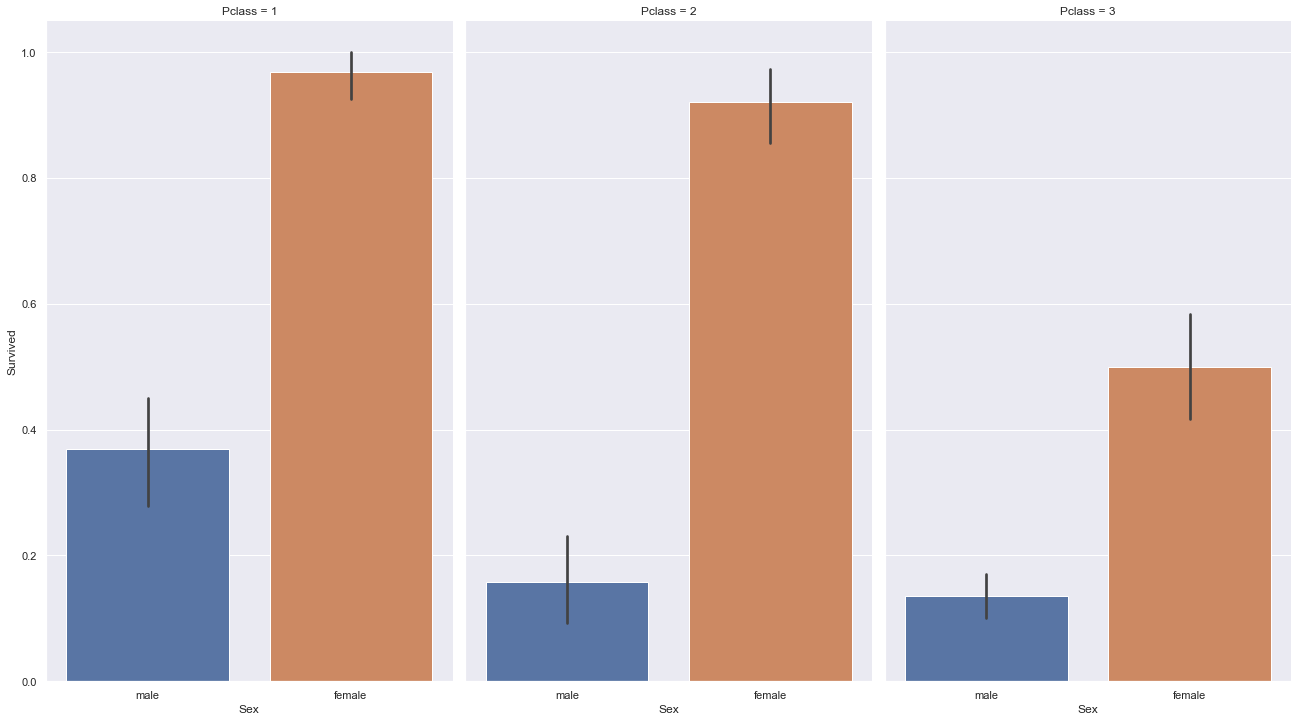

In [90]:
sns.set(rc={'figure.figsize':(15,10)})
sns.catplot(data=df_raw,x="Sex", y="Survived", col="Pclass", kind="bar",height=10, aspect=0.6)

## Buscamos al capitán

In [93]:
df_raw.loc[df_raw['Name'].str.contains(r'Capt.', flags=re.M)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


El capitán no logra sobrevivir